In [5]:
import numpy as np
import math as m

In [60]:
def build_lagrangian_basis(q, e):
    nqpts = q.shape[0]
    nepts = e.shape[0]
    
    basis = np.ones((nepts, nqpts), dtype=np.float64)
    for i in range(nepts):
        for j in range(nqpts):
            for k in range(nqpts):
                if k == j:
                    continue
                basis[i, j] *= (e[i] - q[k])/(q[j] - q[k])
    return basis 

In [69]:
e = np.linspace(0, 1, 100)
q = np.linspace(0, 1, 43)

In [62]:
def interpolate(f, q, e):
    nqpts = q.shape[0]
    nepts = e.shape[0]
    
    basis = build_lagrangian_basis(q, e)
    
    f_e = np.zeros((nepts), dtype=np.float64)
    for i in range(nepts):
        #f_e = np.sum(np.calculate(f(q)) 
        for j in range(nqpts):
            f_e[i] += basis[i, j] * f(q[j])
    return f_e
    

In [63]:
def f(x):
    return np.sin(2*np.pi*x)

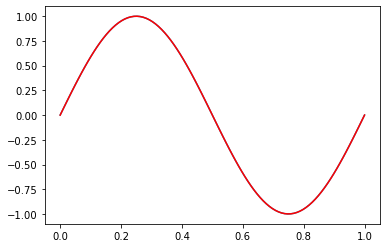

In [70]:
f_interp=interpolate(f, q, e)
plt.plot(e, f_interp)
plt.plot(e, f(e), color="red")

In [67]:
import matplotlib.pyplot as plt

In [125]:
def build_lagrangian_basis_2d(q_x, q_y, e_x, e_y):
    nqxpts = q_x.shape[0]
    nqypts = q_y.shape[0]
    nexpts = e_x.shape[0]
    neypts = e_y.shape[0]
    
    basis_shape = (nexpts, neypts, nqxpts, nqypts)
    basis = np.empty(basis_shape)
    b1 = build_lagrangian_basis(q_x, e_x)
    b2 = build_lagrangian_basis(q_y, e_y)
    
    """
    for i in range(nexpts):
        for j in range(neypts):
            for k in range(nqxpts):
                for ll in range(nqypts):
                    basis[i, j, k, ll] = b1[i, k] * b2[j, ll]
    """
    
    b1 = b1.reshape((nexpts, 1, nqxpts, 1))
    b2 = b2.reshape((1, neypts, 1, nqypts))
    basis = b1 * b2
    return basis
    

In [130]:
q_x = np.linspace(0, 1, 10)
q_y = np.linspace(0, 1, 10)
e_x = np.linspace(0, 1, 1025)
e_y = np.linspace(0, 1, 1025)

basis2d = build_lagrangian_basis_2d(q_x, q_y, e_x, e_y)
#basis2d

In [138]:
def interpolate_2d(f, q_x, q_y, e_x, e_y):
    nqxpts = q_x.shape[0]
    nqypts = q_y.shape[0]
    nexpts = e_x.shape[0]
    neypts = e_y.shape[0]
    
    basis = build_lagrangian_basis_2d(q_x, q_y, e_x, e_y)
    f_e = np.zeros((nexpts, neypts), dtype=np.float64)
    
    f_q = evaluate_f(q_x, q_y)
    """
    for i in range(nexpts):
        for j in range(neypts):
            for k in range(nqxpts):
                for ll in range(nqypts):
                    f_e[i, j] += basis[i, j, k, ll] *f_q[k, ll]
    """
    """
    #get rid of implicit matrix mult
    for k in range(nqxpts):
        for ll in range(nqypts):
            f_e[:, :] += basis[:, :, k, ll] * f_q[k, ll]
    """
    
    basis_reshaped = basis.reshape((nexpts*neypts, nqxpts*nqypts))
    f_q_reshaped = f_q.reshape((nqxpts*nqypts))
    
    f_e = basis_reshaped @ f_q_reshaped
    f_e = f_e.reshape((nexpts, neypts))
    
    return f_e
    

In [132]:
def f(x, y):
    return np.sin(2*np.pi*x)+y*y

In [140]:
%prun interpolate_f = interpolate_2d(f, q_x, q_y, e_x, e_y)

In [134]:
def evaluate_f(e_x, e_y):
    nexpts = e_x.shape[0]
    neypts = e_y.shape[0]
    f_e = np.empty((nexpts, neypts), dtype=np.float64)
    
    for i in range(nexpts):
        for j in range(neypts):
            f_e[i, j] = f(e_x[i], e_y[j])

    return f_e

In [135]:
np.max(np.abs(evaluate_f(e_x, e_y) - interpolate_f))

7.224879486034119e-05